In [2]:
import pandas as pd
import zipfile
import os

# Define path
zip_path = "/content/drive/MyDrive/NLP_RS/archive (2).zip"
extract_path = "/content/drive/MyDrive/NLP_RS/extracted"

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find CSV files
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]




In [3]:
# Cell 1 — Imports & Load Data
# (Run this first)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)

DATA_PATH = r'/content/drive/MyDrive/NLP_RS/extracted/coursera_data.csv'

# load with fallback options for encoding/engine errors
try:
    df = pd.read_csv(DATA_PATH)
except Exception as e:
    print("Standard read_csv failed:", e)
    print("Retrying with engine='python' and utf-8 fallback...")
    df = pd.read_csv(DATA_PATH, engine='python', encoding='utf-8', error_bad_lines=False)

print("Loaded dataframe shape:", df.shape)
display(df.head())


Loaded dataframe shape: (891, 7)


,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
# Cell 2 — EDA & Basic Cleaning
Quick info, dtypes and missing values
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique counts per column:")
for c in df.columns:
    print(f" - {c}: {df[c].nunique()}")

# 2. Clean 'course_students_enrolled' to numeric
def parse_enrollment(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower().replace(',', '')
    try:
        if s.endswith('k'):
            return float(s[:-1]) * 1_000
        if s.endswith('m'):
            return float(s[:-1]) * 1_000_000
        return float(s)
    except:
        # fallback: try to extract digits
        import re
        m = re.search(r'[\d\.]+', s)
        return float(m.group()) if m else np.nan

df['students_enrolled_num'] = df['course_students_enrolled'].apply(parse_enrollment)

# 3. Ensure rating numeric
df['course_rating'] = pd.to_numeric(df['course_rating'], errors='coerce')

# 4. Standardize difficulty as categorical
df['course_difficulty'] = df['course_difficulty'].astype('category')

# 5. Quick summary stats
print("\nNumeric summary (ratings & enrollment):")
display(df[['course_rating','students_enrolled_num']].describe())

# 6. Top 10 organizations by course count
top_orgs = df['course_organization'].value_counts().head(10)
print("\nTop 10 course organizations (by count):")
display(top_orgs)

# 7. Visualizations (inline)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.countplot(y='course_difficulty', data=df, order=df['course_difficulty'].cat.categories)
plt.title("Course Difficulty Distribution")
plt.xlabel("Count")
plt.ylabel("Difficulty")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['course_rating'].dropna(), bins=20, kde=False)
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_orgs.values, y=top_orgs.index)
plt.title("Top 10 Course Organizations by Count")
plt.xlabel("Number of courses")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='students_enrolled_num', y='course_rating', data=df)
plt.xscale('log')
plt.title("Enrollment (log scale) vs Rating")
plt.xlabel("Students enrolled (log scale)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# 8. Save cleaned snapshot for next cells
CLEAN_PATH = '/content/drive/MyDrive/NLP_RS/extracted/coursea_data_cleaned.csv'
df.to_csv(CLEAN_PATH, index=False)
print("\nSaved cleaned snapshot to:", CLEAN_PATH)


SyntaxError: invalid syntax (ipython-input-1505172888.py, line 2)

Shape: (891, 8)

Data types:
 Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
clean_review                 object
dtype: object

Missing values per column:
 Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
clean_review                0
dtype: int64

Unique counts per column:
 - Unnamed: 0: 891
 - course_title: 888
 - course_organization: 154
 - course_Certificate_type: 3
 - course_rating: 14
 - course_difficulty: 4
 - course_students_enrolled: 205
 - clean_review: 887

Numeric summary (ratings & enrollment):


,course_rating,students_enrolled_num
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06



Top 10 course organizations (by count):


,count
course_organization,
University of Pennsylvania,59
University of Michigan,41
Google Cloud,34
Duke University,28
Johns Hopkins University,28
"University of California, Irvine",27
IBM,22
University of Illinois at Urbana-Champaign,22
"University of California, Davis",21


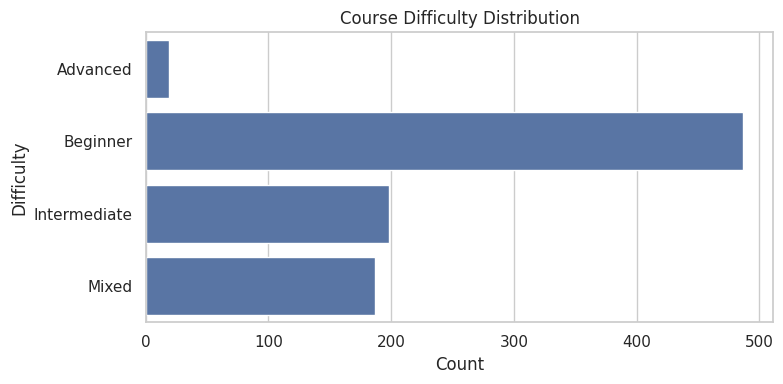

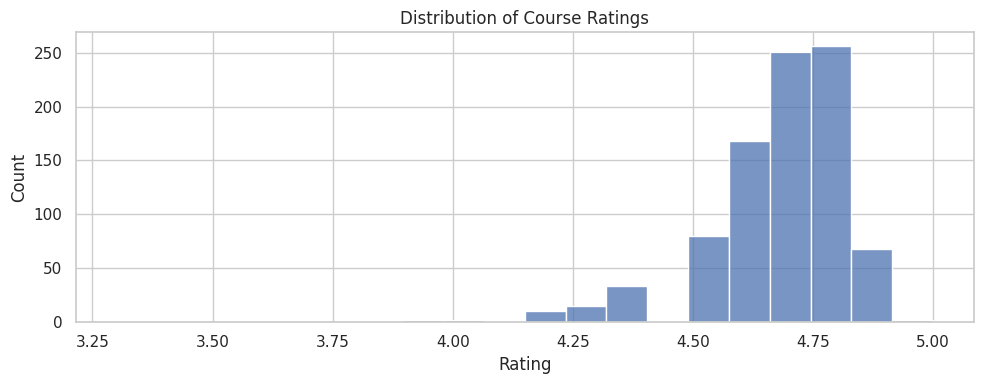

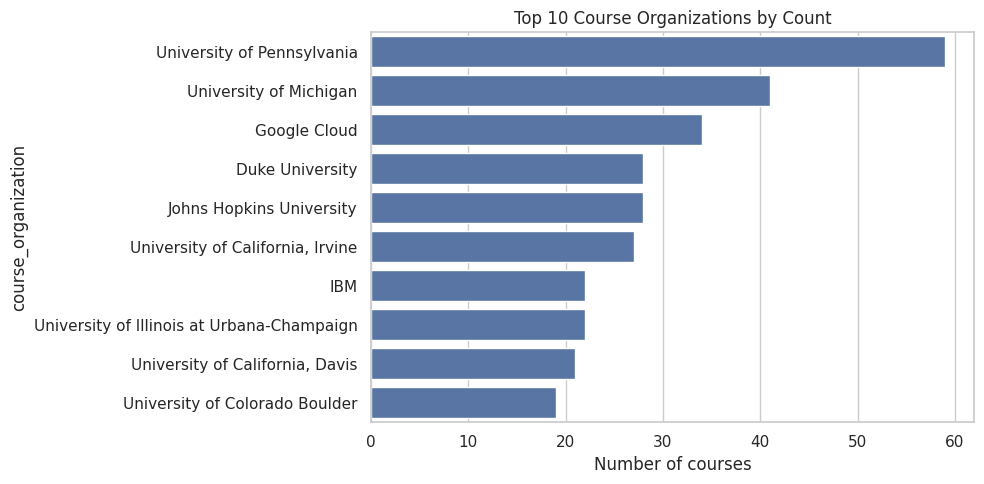

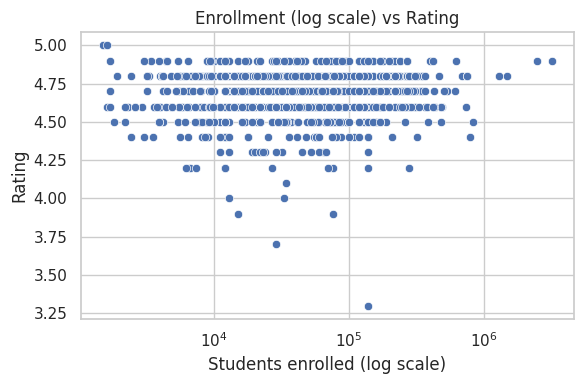


Saved cleaned snapshot to: /content/drive/MyDrive/NLP_RS/extracted/coursea_data_cleaned.csv


In [7]:
# Cell 2 — EDA & Basic Cleaning

# 1. Quick info, dtypes and missing values
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique counts per column:")
for c in df.columns:
    print(f" - {c}: {df[c].nunique()}")

# 2. Clean 'course_students_enrolled' to numeric
def parse_enrollment(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower().replace(',', '')
    try:
        if s.endswith('k'):
            return float(s[:-1]) * 1_000
        if s.endswith('m'):
            return float(s[:-1]) * 1_000_000
        return float(s)
    except:
        # fallback: try to extract digits
        import re
        m = re.search(r'[\d\.]+', s)
        return float(m.group()) if m else np.nan

df['students_enrolled_num'] = df['course_students_enrolled'].apply(parse_enrollment)

# 3. Ensure rating numeric
df['course_rating'] = pd.to_numeric(df['course_rating'], errors='coerce')

# 4. Standardize difficulty as categorical
df['course_difficulty'] = df['course_difficulty'].astype('category')

# 5. Quick summary stats
print("\nNumeric summary (ratings & enrollment):")
display(df[['course_rating','students_enrolled_num']].describe())

# 6. Top 10 organizations by course count
top_orgs = df['course_organization'].value_counts().head(10)
print("\nTop 10 course organizations (by count):")
display(top_orgs)

# 7. Visualizations (inline)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.countplot(y='course_difficulty', data=df, order=df['course_difficulty'].cat.categories)
plt.title("Course Difficulty Distribution")
plt.xlabel("Count")
plt.ylabel("Difficulty")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(df['course_rating'].dropna(), bins=20, kde=False)
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=top_orgs.values, y=top_orgs.index)
plt.title("Top 10 Course Organizations by Count")
plt.xlabel("Number of courses")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='students_enrolled_num', y='course_rating', data=df)
plt.xscale('log')
plt.title("Enrollment (log scale) vs Rating")
plt.xlabel("Students enrolled (log scale)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# 8. Save cleaned snapshot for next cells
CLEAN_PATH = '/content/drive/MyDrive/NLP_RS/extracted/coursea_data_cleaned.csv'
df.to_csv(CLEAN_PATH, index=False)
print("\nSaved cleaned snapshot to:", CLEAN_PATH)


In [9]:
# Cell 3 — NLP Preprocessing & Embedding Generation (fixed)
!pip install -q sentence-transformers

import re
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
import numpy as np

nltk.download('stopwords')

# 1. Combine text features to represent each course
# convert categorical column to string safely
df['course_difficulty_str'] = df['course_difficulty'].astype(str).replace('nan', '')

df['text_data'] = (
    df['course_title'].fillna('') + ' ' +
    df['course_organization'].fillna('') + ' ' +
    df['course_Certificate_type'].fillna('') + ' ' +
    df['course_difficulty_str'].fillna('')
)

# 2. Text cleaning
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text_data'].apply(clean_text)

# 3. Initialize SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# 4. Generate embeddings (vector representations)
embeddings = model.encode(df['clean_text'].tolist(), show_progress_bar=True)

# 5. Save embeddings for reuse
EMB_PATH = '/content/drive/MyDrive/NLP_RS/extracted/course_embeddings.npy'
np.save(EMB_PATH, embeddings)
print("Embeddings saved to:", EMB_PATH)

# Check shape and sample
print("Embedding matrix shape:", embeddings.shape)
for i in range(3):
    print(f"\nCourse {i}: {df.loc[i, 'course_title']}")
    print("Clean text:", df.loc[i, 'clean_text'][:120])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/28 [00:00<?, ?it/s]

Embeddings saved to: /content/drive/MyDrive/NLP_RS/extracted/course_embeddings.npy
Embedding matrix shape: (891, 384)

Course 0: (ISC)² Systems Security Certified Practitioner (SSCP)
Clean text: isc systems security certified practitioner sscp isc specialization beginner

Course 1: A Crash Course in Causality:  Inferring Causal Effects from Observational Data
Clean text: crash course causality inferring causal effects observational data university pennsylvania course intermediate

Course 2: A Crash Course in Data Science
Clean text: crash course data science johns hopkins university course mixed


In [10]:
# Cell 4 — Build Recommender Functions (cosine similarity) + Demo

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from pathlib import Path

# Paths
EMB_PATH = '/content/drive/MyDrive/NLP_RS/extracted/course_embeddings.npy'
CLEAN_PATH = '/content/drive/MyDrive/NLP_RS/extracted/coursea_data_cleaned.csv'
MODEL_DIR = Path('/content/drive/MyDrive/NLP_RS/extracted/')
MODEL_DIR.mkdir(parents=True, exist_ok=True)
RECOMMENDER_STATE = MODEL_DIR / 'recommender_state.pkl'

# 1. Load embeddings and dataframe (if not already in memory)
embeddings = np.load(EMB_PATH)
# if df was not in memory, load cleaned snapshot
try:
    df.shape
except NameError:
    df = pd.read_csv(CLEAN_PATH)

# 2. Normalize embeddings for cosine similarity (L2)
from sklearn.preprocessing import normalize
emb_norm = normalize(embeddings, norm='l2')

# 3. Helper: get top-k indexes from similarity vector (exclude self)
def top_k_from_sim(sim_vec, k=5, exclude_idx=None):
    if exclude_idx is not None:
        sim_vec = sim_vec.copy()
        sim_vec[exclude_idx] = -1.0
    topk_idx = np.argsort(-sim_vec)[:k]
    return topk_idx, sim_vec[topk_idx]

# 4. Recommend by course index (row index in df)
def recommend_by_index(idx, k=5):
    sim = emb_norm.dot(emb_norm[idx])
    idxs, scores = top_k_from_sim(sim, k=k, exclude_idx=idx)
    results = []
    for i,s in zip(idxs, scores):
        results.append({
            'index': int(i),
            'course_title': df.loc[i, 'course_title'],
            'organization': df.loc[i, 'course_organization'],
            'rating': df.loc[i, 'course_rating'],
            'score': float(s)
        })
    return results

# 5. Recommend by text query (encode with model used earlier)
def recommend_by_text(query_text, k=5):
    q_clean = clean_text(query_text)
    q_emb = model.encode([q_clean])
    q_emb_n = q_emb / np.linalg.norm(q_emb, axis=1, keepdims=True)
    sim = emb_norm.dot(q_emb_n[0])
    idxs, scores = top_k_from_sim(sim, k=k, exclude_idx=None)
    results = []
    for i,s in zip(idxs, scores):
        results.append({
            'index': int(i),
            'course_title': df.loc[i, 'course_title'],
            'organization': df.loc[i, 'course_organization'],
            'rating': df.loc[i, 'course_rating'],
            'score': float(s)
        })
    return results

# 6. Save recommender state (normalized embeddings + df minimal columns) for Streamlit app
state = {
    'emb_norm': emb_norm,
    'df_small': df[['course_title','course_organization','course_rating','course_difficulty','clean_text']].reset_index(drop=True)
}
with open(RECOMMENDER_STATE, 'wb') as f:
    pickle.dump(state, f)
print("Saved recommender state to:", RECOMMENDER_STATE)

# 7. Quick demo outputs. Change index or query to test.
print("\nDemo: Top 5 similar to course index 2")
for r in recommend_by_index(2, k=5):
    print(r)

print("\nDemo: Top 5 for query -> 'introduction to machine learning beginner friendly'")
for r in recommend_by_text("introduction to machine learning beginner friendly", k=5):
    print(r)


Saved recommender state to: /content/drive/MyDrive/NLP_RS/extracted/recommender_state.pkl

Demo: Top 5 similar to course index 2
{'index': 800, 'course_title': 'The Data Scientist’s Toolbox', 'organization': 'Johns Hopkins University', 'rating': np.float64(4.6), 'score': 0.7997927665710449}
{'index': 590, 'course_title': 'Mastering Data Analysis in Excel', 'organization': 'Duke University', 'rating': np.float64(4.2), 'score': 0.6649784445762634}
{'index': 196, 'course_title': 'Data Science', 'organization': 'Johns Hopkins University', 'rating': np.float64(4.5), 'score': 0.6466619372367859}
{'index': 199, 'course_title': 'Data Science: Foundations using R', 'organization': 'Johns Hopkins University', 'rating': np.float64(4.6), 'score': 0.623865008354187}
{'index': 470, 'course_title': 'Introduction to Big Data', 'organization': 'University of California San Diego', 'rating': np.float64(4.6), 'score': 0.619384229183197}

Demo: Top 5 for query -> 'introduction to machine learning beginner